"Bitcoin is the currency of the Internet: a distributed, worldwide, decentralized digital money. Unlike traditional currencies such as dollars, bitcoins are issued and managed without any central authority whatsoever: there is no government, company, or bank in charge of Bitcoin. As such, it is more resistant to wild inflation and corrupt banks. With Bitcoin, you can be your own bank." -- [r/bitcoin](https://www.reddit.com/r/Bitcoin/)

This brief summary of bitcoin is as good as it gets. It has been around for 10 years now. It has catched anyones attention at least once in this period and has been centerpoint of media, internet and discussions all over the world. What most common people are interested in is the volatile worth of bitcoin and the big profits it has been possible to make over the years with just the right timing of investment. 

Bitcoin is mainly obtained and trained in big exchange sites such as coinbase and bitstamp. The main currency it is based on is USD and can be exchanged real-time. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('float_format', '{:f}'.format)
import xgboost
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
#loading the data from csv
df = pd.read_csv('bitstamp2012-2019.csv')

In [3]:
df.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.390000,4.390000,4.390000,4.390000,0.455581,2.000000,4.390000
1,1325317980,nan,nan,nan,nan,nan,nan,nan
2,1325318040,nan,nan,nan,nan,nan,nan,nan
3,1325318100,nan,nan,nan,nan,nan,nan,nan
4,1325318160,nan,nan,nan,nan,nan,nan,nan


In [4]:
df['datetime'] = pd.to_datetime(df['Timestamp'],unit='s')
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
df['year'] = pd.to_datetime(df['Timestamp'],unit='s').dt.year
df['month'] = pd.to_datetime(df['Timestamp'],unit='s').dt.month
df['day'] = pd.to_datetime(df['Timestamp'],unit='s').dt.day
df['hour'] = pd.to_datetime(df['Timestamp'],unit='s').dt.hour



In [5]:
df.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,datetime,date,year,month,day,hour
0,1325317920,4.390000,4.390000,4.390000,4.390000,0.455581,2.000000,4.390000,2011-12-31 07:52:00,2011-12-31,2011,12,31,7
1,1325317980,nan,nan,nan,nan,nan,nan,nan,2011-12-31 07:53:00,2011-12-31,2011,12,31,7
2,1325318040,nan,nan,nan,nan,nan,nan,nan,2011-12-31 07:54:00,2011-12-31,2011,12,31,7
3,1325318100,nan,nan,nan,nan,nan,nan,nan,2011-12-31 07:55:00,2011-12-31,2011,12,31,7
4,1325318160,nan,nan,nan,nan,nan,nan,nan,2011-12-31 07:56:00,2011-12-31,2011,12,31,7


In [6]:
#missing analysis daily
missing_analysis = pd.DataFrame()
missing_analysis['date'] = df['date']
missing_analysis['missing'] = df['High'].apply(lambda x: 0 if x>=0 else 1)
missing_analysis = missing_analysis.groupby('date').mean().reset_index()


C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


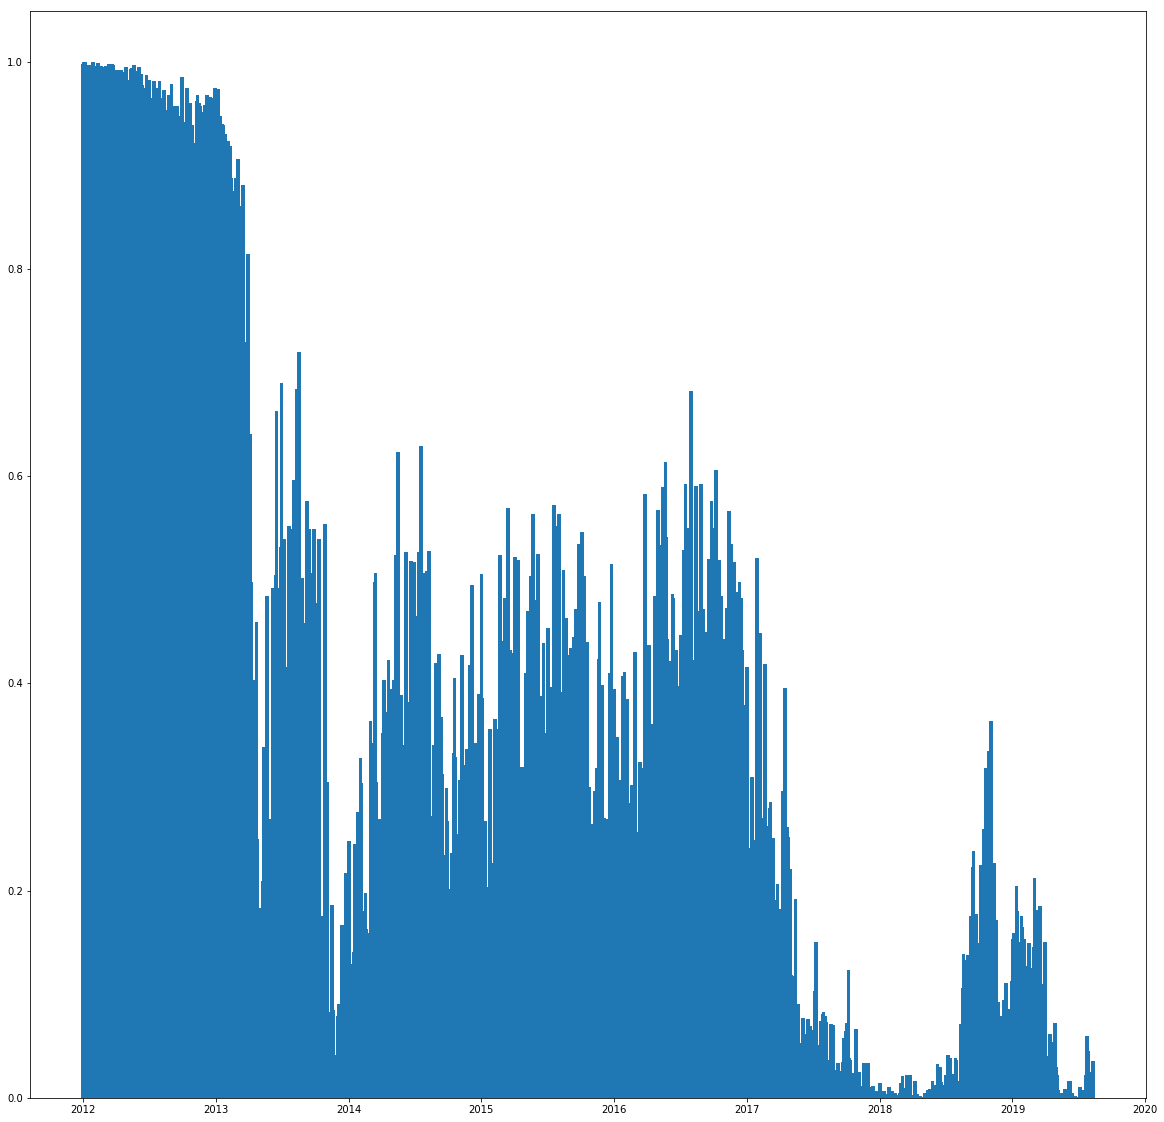

In [7]:
#plotting missing daily for over the years
plt.figure(figsize=(20,20))
ax = plt.subplot(111)
ax.bar(missing_analysis['date'] , missing_analysis['missing'], width=10)
ax.xaxis_date()
plt.savefig('missing_analysis.png', bbox_inches='tight')
plt.show()

In [8]:
#percentage of nulls
df['Open'].isna().sum()/len(df.index)

0.30814691558664903

In [9]:
#summary of dataframe
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,hour
count,3997697.000000,2765819.000000,2765819.000000,2765819.000000,2765819.000000,2765819.000000,2765819.000000,2765819.000000,3997697.000000,3997697.000000,3997697.000000,3997697.000000
mean,1445483108.949458,3059.659498,3062.027393,3057.021957,3059.637962,10.422325,26868.120014,3059.499288,2015.319617,6.347423,15.704632,11.500388
std,69403182.836201,3741.168377,3744.835458,3736.985091,3741.133665,33.750103,96204.248821,3740.910028,2.207230,3.417127,8.806491,6.922338
min,1325317920.000000,3.800000,3.800000,1.500000,1.500000,0.000000,0.000000,3.800000,2011.000000,1.000000,1.000000,0.000000
25%,1385283360.000000,374.270000,374.520000,374.000000,374.250000,0.453000,286.551478,374.243438,2013.000000,3.000000,8.000000,6.000000
50%,1445637120.000000,779.450000,779.910000,779.010000,779.490000,2.100451,2209.965925,779.413709,2015.000000,6.000000,16.000000,12.000000
75%,1505602560.000000,5635.745000,5639.500000,5631.100000,5635.355000,8.179424,15546.885820,5635.118341,2017.000000,9.000000,23.000000,18.000000
max,1565568000.000000,19665.760000,19666.000000,19649.960000,19665.750000,5853.852166,7569437.061300,19663.298888,2019.000000,12.000000,31.000000,23.000000


In [10]:
#missing handling
#replacing volumes and weighted price with 0s as it does not exist
#forward filling method for prices
df['Volume_(BTC)'].fillna(value=0, inplace=True)
df['Volume_(Currency)'].fillna(value=0, inplace=True)
df['Weighted_Price'].fillna(value=0, inplace=True)
missing_filled_df = df.ffill()

In [11]:
def plot_yearly(df, attr):
    
    """
    Description: This function can be used to plot an attribute of a dataframe for 2015 to 2019 where each year is shown
    distinctly
    Arguments:
        df: dataframe of the attribute
        attr: column name to plot yearly for 5 years

    Returns:
        None
    """
    plt.figure(figsize=(20,20))
    plt.plot(df[df['year']==2015][attr], label='2015')
    plt.plot(df[df['year']==2016][attr], label='2016')
    plt.plot(df[df['year']==2017][attr], label='2017')
    plt.plot(df[df['year']==2018][attr], label='2018')
    plt.plot(df[df['year']==2019][attr], label='2019')
    # Add labels and title
    # format the ticks
    #plt.xticks(range(1,365))
    plt.title("Bitcoin over time - Graph")
    plt.xlabel('Time')
    plt.ylabel(attr)
    plt.legend()
    plt.savefig('bitcoin-{}-by-year.png'.format(attr), bbox_inches='tight')
    plt.show()
    

In [12]:
#transforming the dataframe from datetime unique to daily unique data
daily_means = missing_filled_df.groupby('date').mean().reset_index()
daily_means['Mean'] = daily_means[['High', 'Low']].mean(axis=1)
daily_means['weekday'] = pd.to_datetime(daily_means['date']).dt.weekday
daily_means.head(5)

,date,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,hour,Mean,weekday
0,2011-12-31,1325346930.000000,4.472552,4.472624,4.472552,4.472624,0.098469,0.439381,0.018478,2011.000000,12.000000,31.000000,15.429752,4.472588,5
1,2012-01-01,1325419170.000000,4.680778,4.680778,4.680778,4.680778,0.015001,0.073458,0.010014,2012.000000,1.000000,1.000000,11.500000,4.680778,6
2,2012-01-02,1325505570.000000,5.000000,5.000000,5.000000,5.000000,0.013228,0.066139,0.003472,2012.000000,1.000000,2.000000,11.500000,5.000000,0
3,2012-01-03,1325591970.000000,5.145917,5.145917,5.145917,5.145917,0.061137,0.322781,0.029181,2012.000000,1.000000,3.000000,11.500000,5.145917,1
4,2012-01-04,1325678370.000000,5.176708,5.228729,5.176708,5.228729,0.074468,0.394497,0.032551,2012.000000,1.000000,4.000000,11.500000,5.202719,2


In [13]:
#creating monthly and 3 months moving average
daily_means['Rolling30'] =daily_means['Mean'].rolling(window=30).mean()
daily_means['Rolling90'] =daily_means['Mean'].rolling(window=90).mean()
daily_means['RollingVolume30'] =daily_means['Volume_(BTC)'].rolling(window=30).mean()
daily_means['RollingVolume90'] =daily_means['Volume_(BTC)'].rolling(window=90).mean()

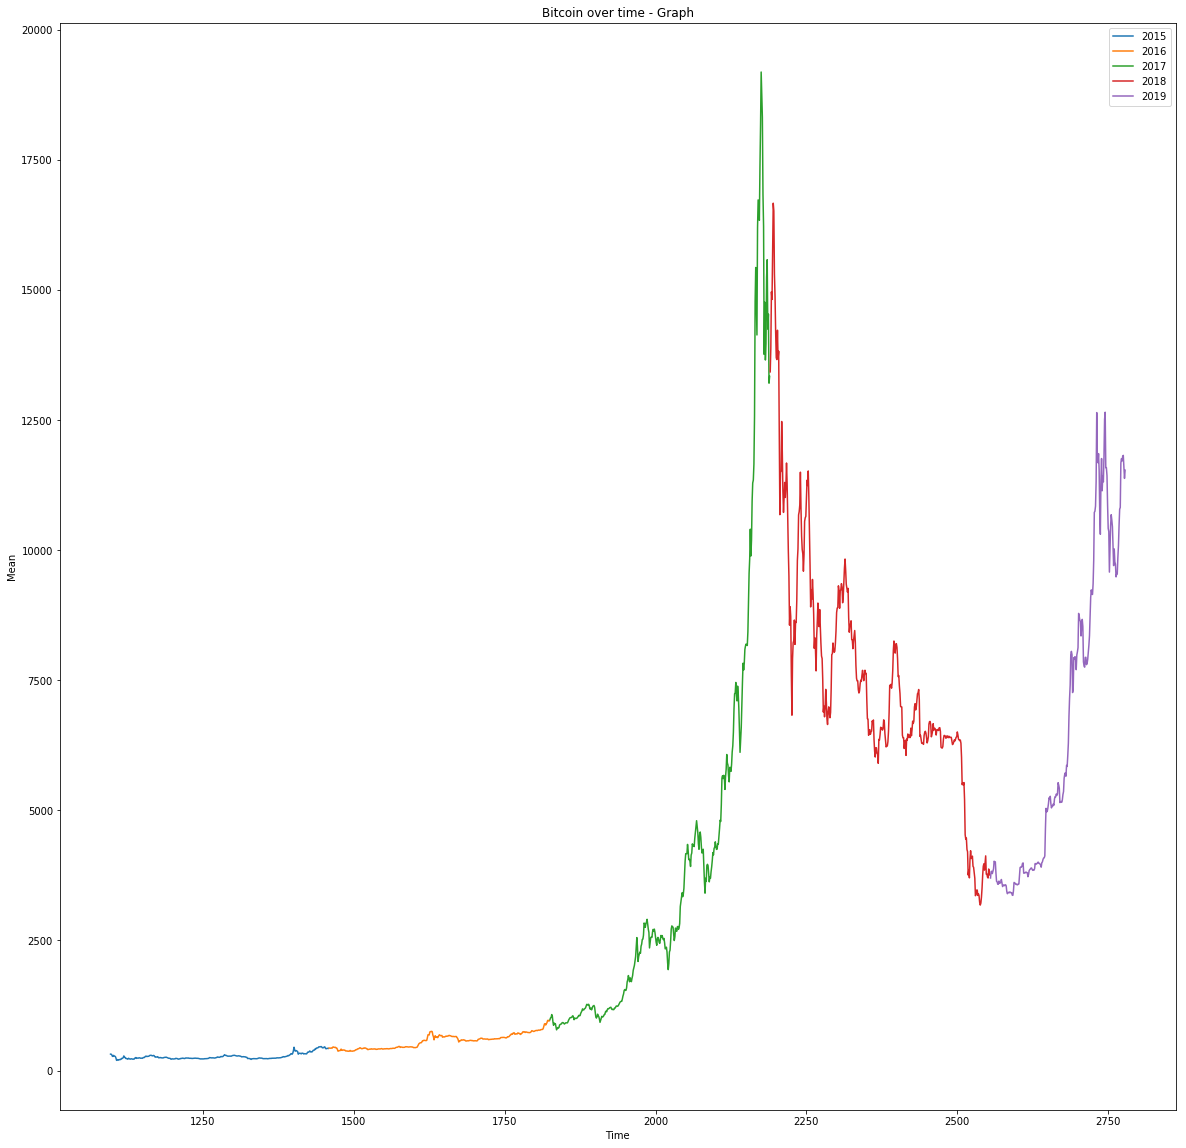

In [14]:
#plotting mean daily value thorughout the years
plot_yearly(daily_means, 'Mean')

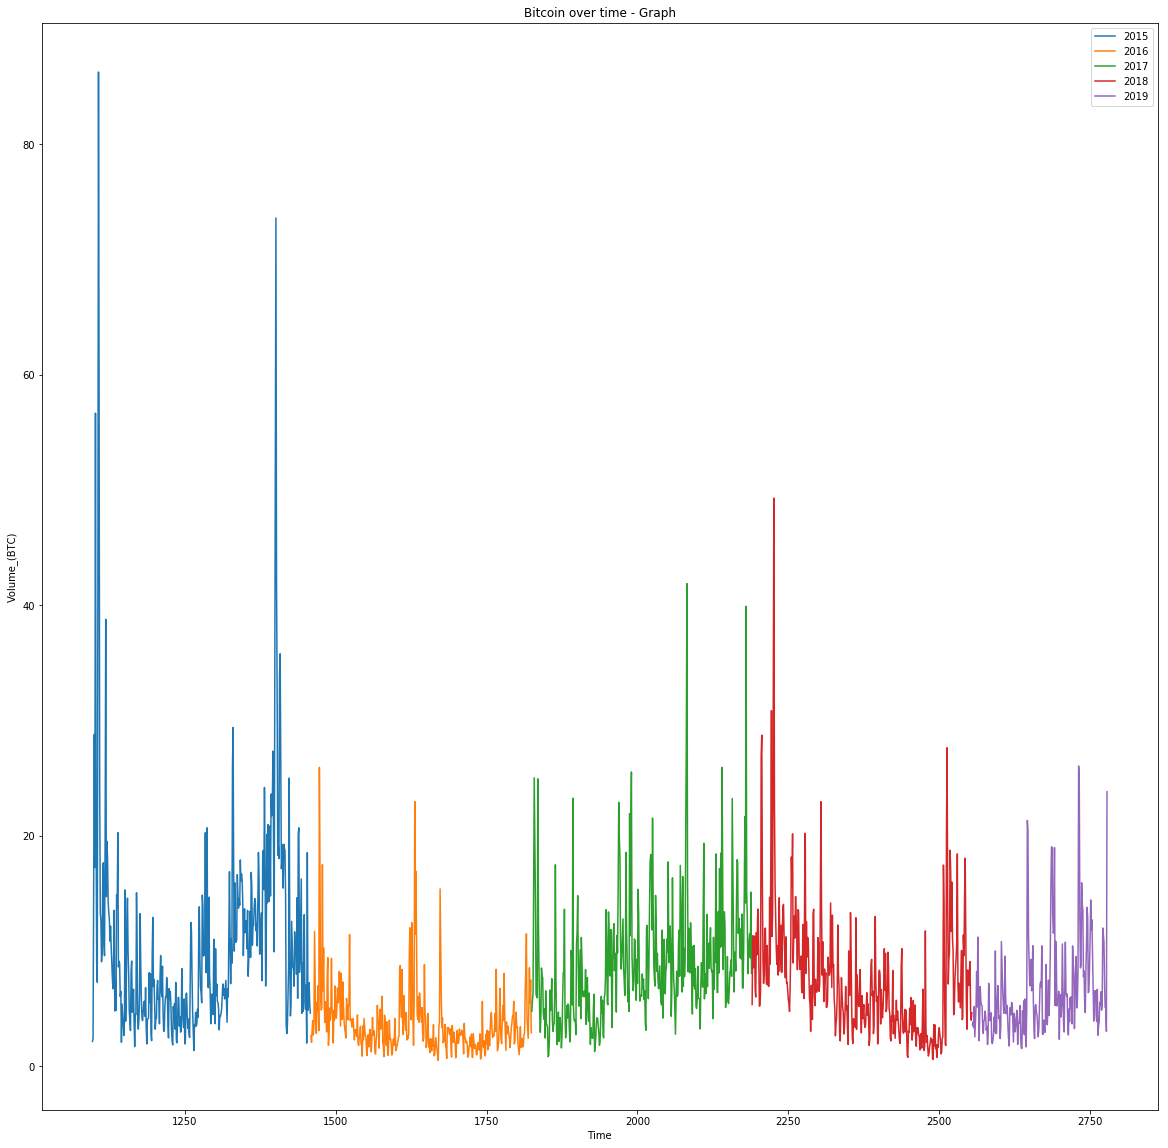

In [15]:
#plotting mean bitcoin volume thorughout the years
plot_yearly(daily_means, 'Volume_(BTC)')

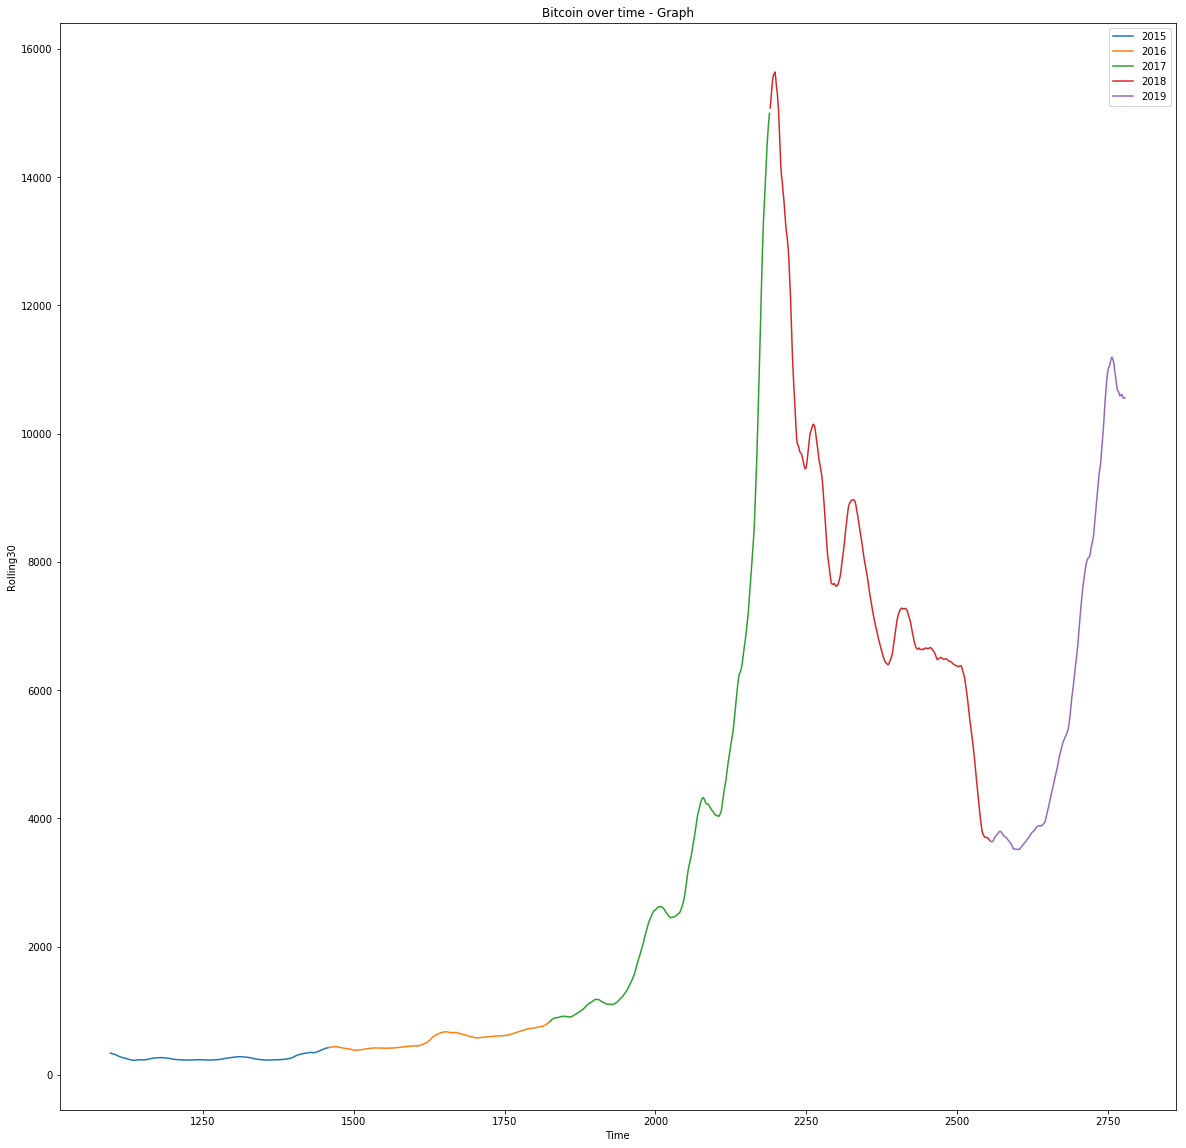

In [16]:
#plotting monthly moving average thorughout the years
plot_yearly(daily_means, 'Rolling30')

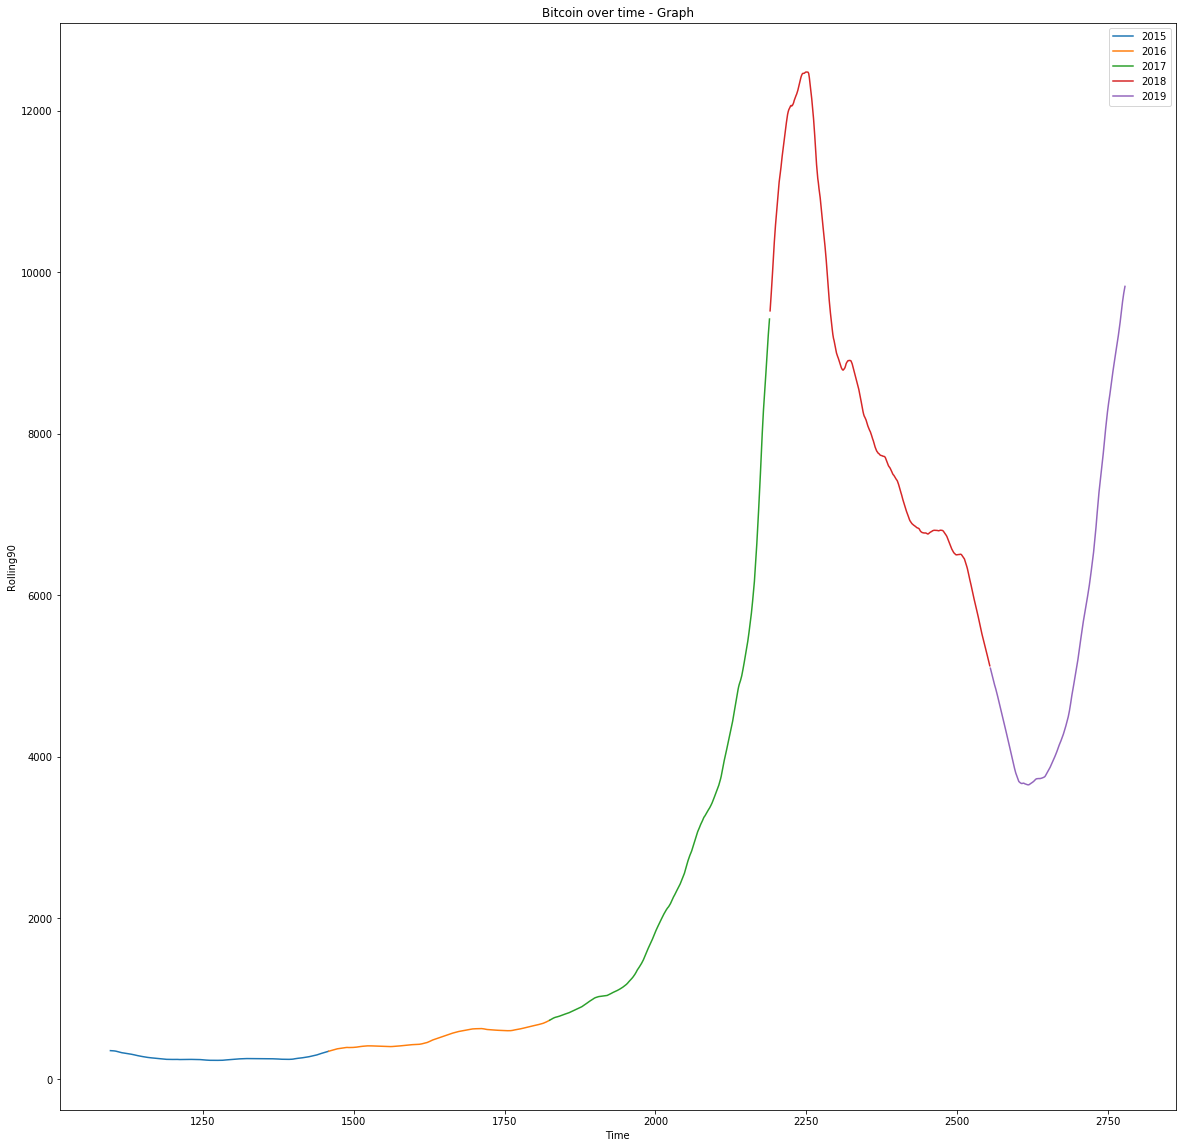

In [17]:
#plotting 3 months moving average thorughout the years
plot_yearly(daily_means, 'Rolling90')

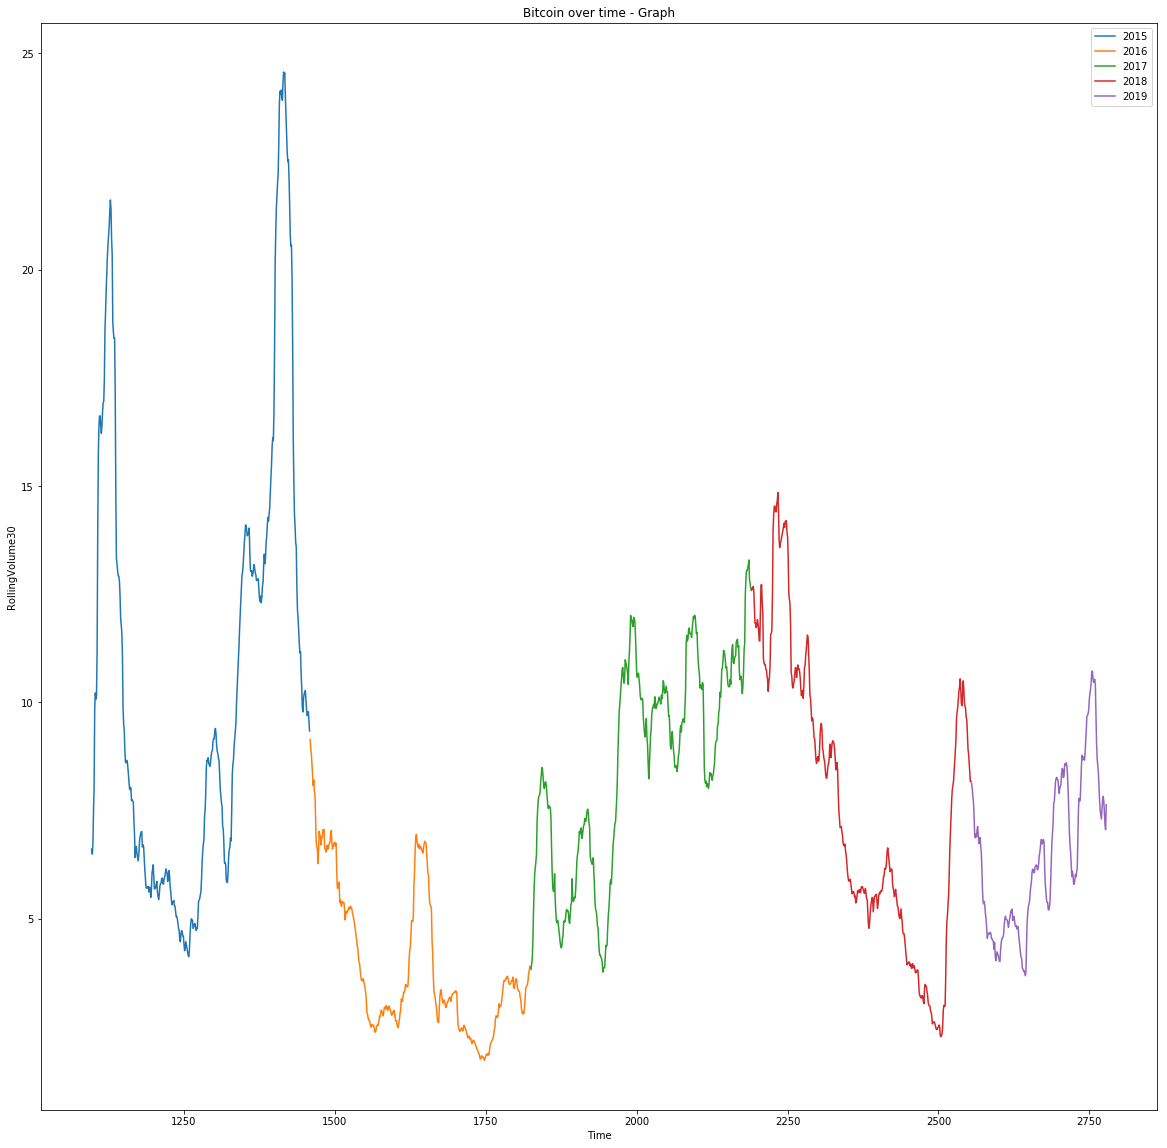

In [18]:
#plotting monthly moving average of volume thorughout the years
plot_yearly(daily_means, 'RollingVolume30')

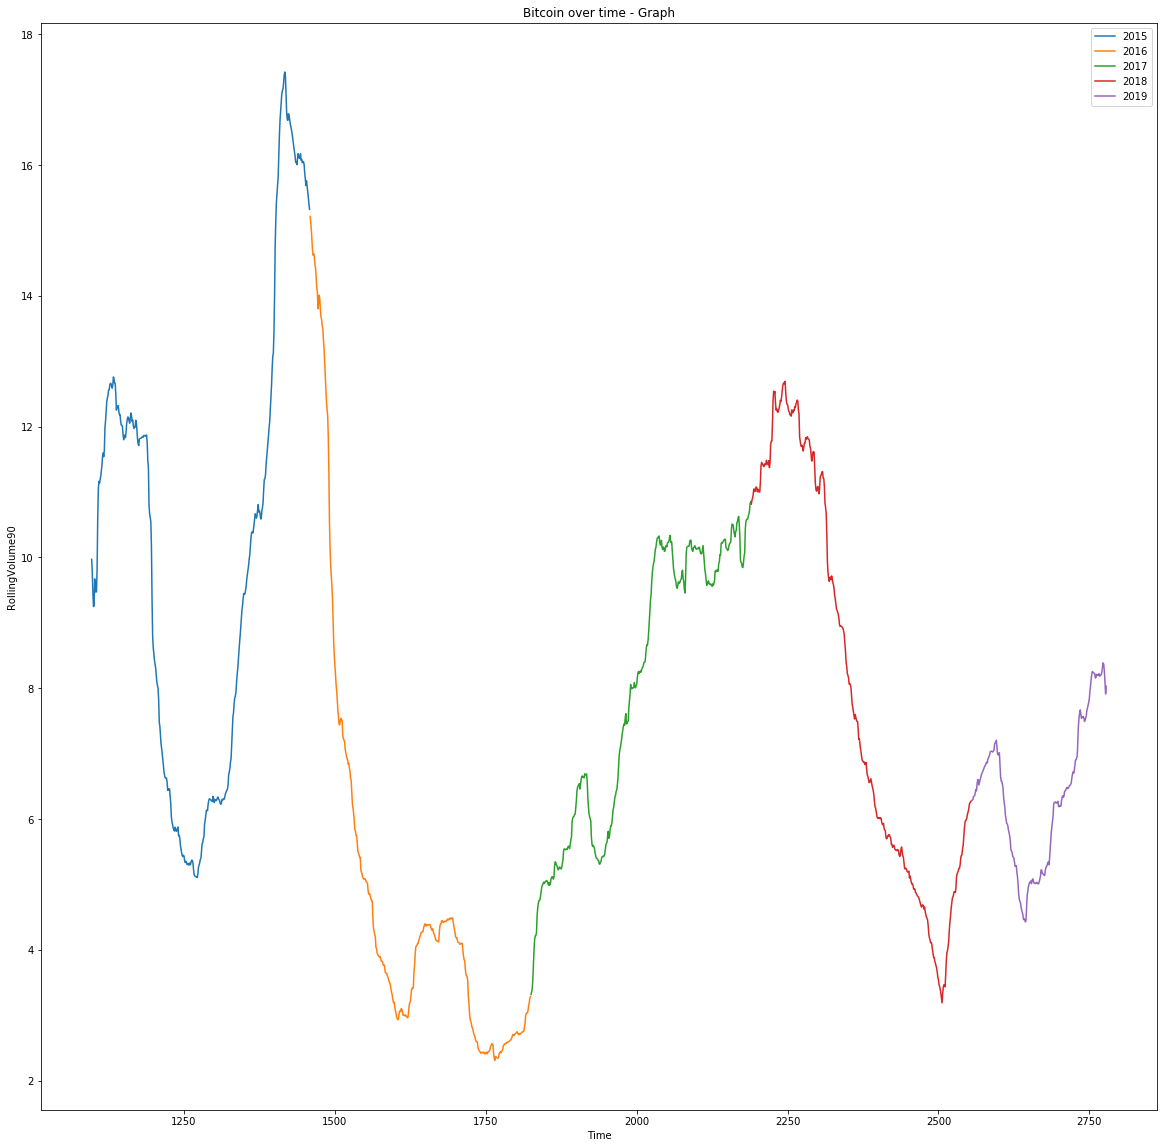

In [19]:
#plotting 3 monthly moving average of volume thorughout the years
plot_yearly(daily_means, 'RollingVolume90')

Moving averages helps smoothing out the bitcoin values and helps us remove the big and fast shifts that happens on bitcoin value in short period of time. This shows us a smoother plot which looks more preidactable than the raw mess bitcoin was. Now it is time to predict bitcoin with a linear model.

In [20]:
#dividing the data in to train and test. The data where moving average for 90 days could not be calculated 
#was removed from the dataset.
model_data = daily_means[daily_means['Rolling90'].isna()==False]
model_data_train = model_data[model_data['date']<= pd.to_datetime("2018-12-31").date()]
model_data_test = model_data[model_data['date']>= pd.to_datetime("2018-12-31").date()]



In [21]:
#target of the model forst both train and test
y_train = model_data_train[['Mean']][1:]
y_test = model_data_test[['Mean']][1:]

In [22]:
#date values as model variables
X1_train = model_data_train[['month', 'day', 'weekday']][:-1]
X1_test = model_data_test[['month', 'day', 'weekday']][:-1]

In [23]:
#rolling volumes and average of previous day as model variables
X2_train = model_data_train[['Rolling30','Rolling90', 'RollingVolume30', 'RollingVolume90', 'Mean']][:-1]
X2_test = model_data_test[['Rolling30','Rolling90', 'RollingVolume30', 'RollingVolume90', 'Mean']][:-1]

In [24]:
#merging all variables
X_train = pd.concat([X1_train, X2_train], axis=1)
X_test = pd.concat([X1_test, X2_test], axis=1)

In [25]:
#shape of the variables
y_train.shape, X_train.shape, y_test.shape, X_test.shape

((2465, 1), (2465, 8), (224, 1), (224, 8))

In [26]:
def plot_pred_act(pred, act, name):
    """
    Description: This function can be used to plot prediction of a model and actual outcomes that occured
    Arguments:
        pred: prediction values
        act: actual values
        name: name of the file

    Returns:
        None
    """
    
    plt.figure(figsize=(20,20))
    plt.plot(pred, label='pred')
    plt.plot(act, label='actual')
    # Add labels and title
    # format the ticks
    #plt.xticks(range(1,365))
    plt.title("Pred vs Actual")
    plt.xlabel('date')
    plt.ylabel('Bitcoin Value')
    plt.legend()
    plt.savefig('{}-pred-vs-actual.png'.format(name), bbox_inches='tight')
    plt.show()

In [27]:
#linear regression model
linreg = LinearRegression() 
linreg.fit(X_train, y_train)
predictions_linreg_train = linreg.predict(X_train)
predictions_linreg = linreg.predict(X_test)


In [28]:
#mse of linear regression
mean_squared_error(y_test.reset_index()['Mean'], predictions_linreg), mean_squared_error(y_train.reset_index()['Mean'], predictions_linreg_train)

(74344.58655205971, 30559.876703666116)

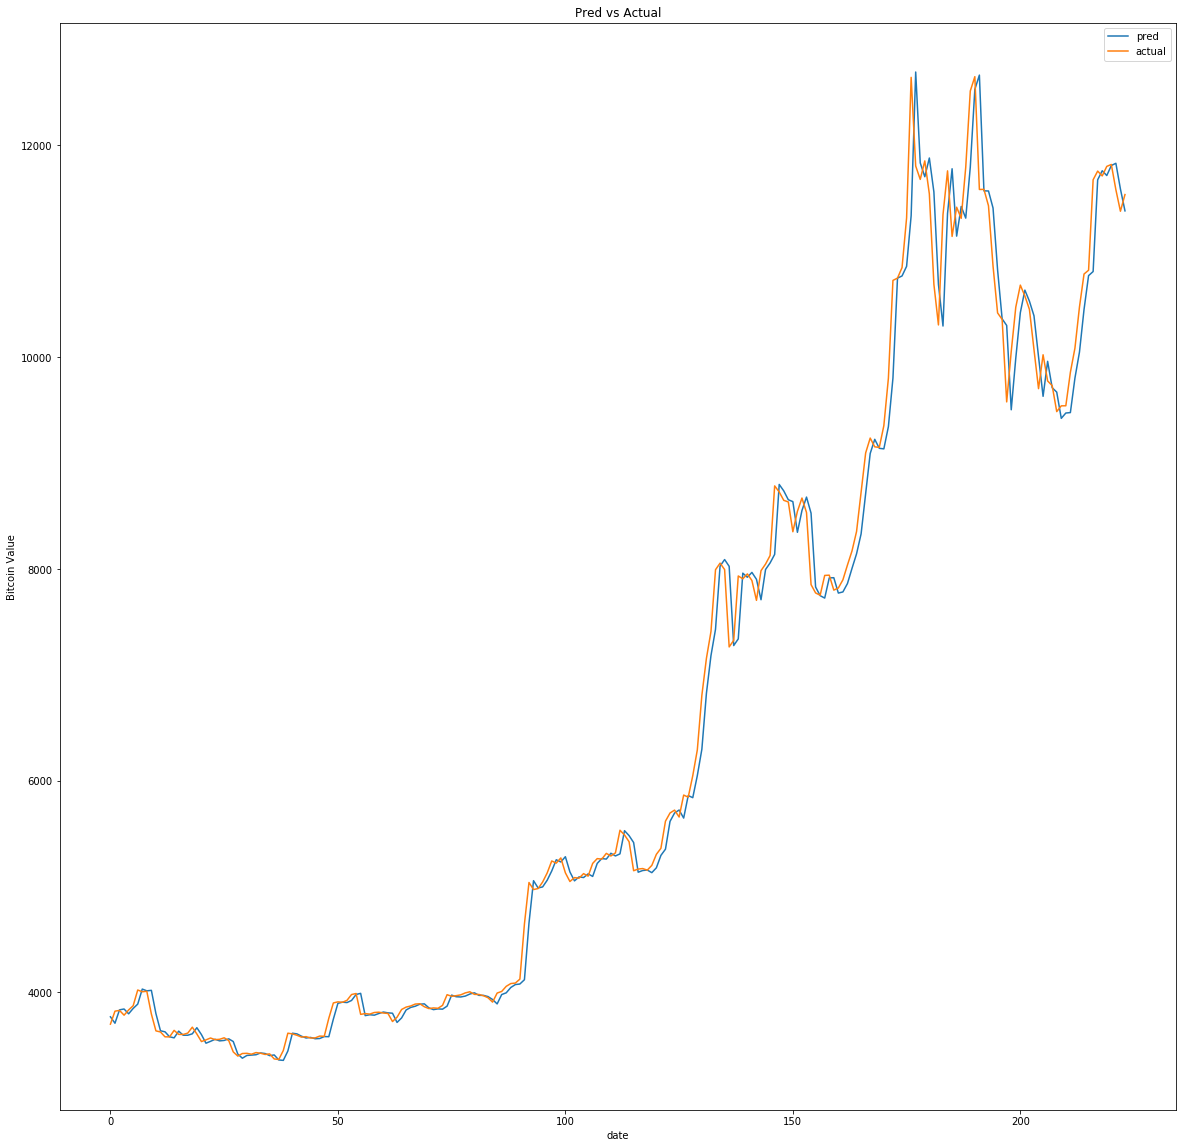

In [29]:
#plot of linear regression
plot_pred_act(predictions_linreg, y_test.reset_index()['Mean'], 'linreg')

In [30]:
#xgb with gridsearch
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = xgboost.XGBRegressor(learning_rate=0.02, n_estimators=300, objective='reg:squarederror',
                    silent=True, nthread=1)
grid = GridSearchCV(xgb, params)
grid.fit(X_train, y_train)
predictions_xgb_train = grid.predict(X_train)
predictions_xgb = grid.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
#mse of xgb
mean_squared_error(y_test.reset_index()['Mean'], predictions_xgb), mean_squared_error(y_train.reset_index()['Mean'], predictions_xgb_train)

(131252.73759965523, 10285.556765538404)

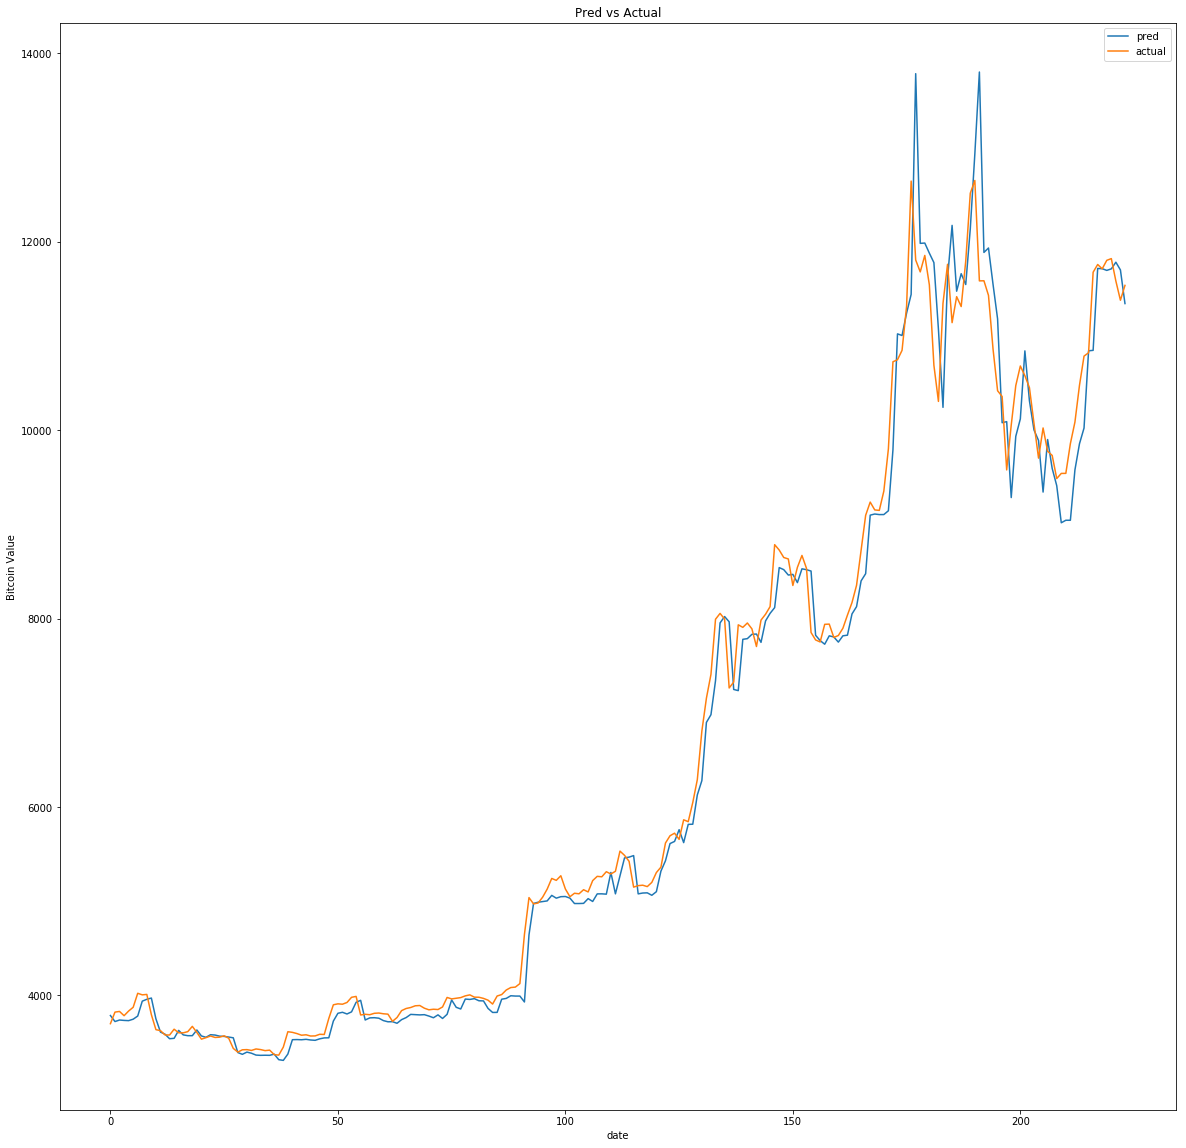

In [32]:
#plot of xgb
plot_pred_act(predictions_xgb, y_test.reset_index()['Mean'], 'xgbreg')

Biggest problem we see with both linear regression and xgb is that while the graph looks good, they actually come with a lag which destroys the whole purpose. More important than the exact value, lets see if we did a good job on predicting if bitcoin will go plus or minus the following day.

In [33]:
#convert positive differences to 1 and negative differences to 0
predictions_xgb_class = pd.DataFrame(predictions_xgb).reset_index()[0].diff().apply(lambda x: 1 if x>0 else 0)
predictions_linreg_class = pd.DataFrame(predictions_linreg).reset_index()[0].diff().apply(lambda x: 1 if x>0 else 0)
y_test_class = y_test.reset_index()['Mean'].diff().apply(lambda x: 1 if x>0 else 0)

In [34]:
#total matches for linear models
total_match_linreg = 0 
total_match_xgbreg = 0 
for i in range(len(y_test_class)):
    if y_test_class[i] == predictions_linreg_class[i]:
        total_match_linreg += 1
    if y_test_class[i] == predictions_xgb_class[i]:
        total_match_xgbreg += 1    
print("linear regression matched is {} and xgboost matches is {} in total of {}".format(total_match_linreg, total_match_xgbreg, len(y_test_class)))

linear regression matched is 126 and xgboost matches is 129 in total of 224


In [35]:
#f1 score of the converted values to see how well the model actually predicted the change
f1_score(y_test_class, predictions_xgb_class, average='weighted'), f1_score(y_test_class, predictions_linreg_class, average='weighted')

(0.5772285598177095, 0.5631068951448388)

This shows that even though it is better than random, the model is not very good at predicting the positive and negative shifts. Lets have our target as a binary and use classifier to guess positive or negative changes for investment purposes

In [36]:
#reformatting target to binary values with positive change as 1 and negative change as 0
y_train_class = y_train.reset_index()['Mean'].diff().apply(lambda x: 1 if x>0 else 0)

In [37]:
#logistic regression for binary targets
logreg = LogisticRegression()
logreg.fit(X_train, y_train_class)
predictions_logreg_class = logreg.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
#f1 score of the logistic regression
f1_score(y_test_class, predictions_logreg_class, average='weighted')

0.4506772297469972

In [39]:
#xgb classifier for binary target with same gridsearch parameters
xgbclf = xgboost.XGBClassifier(learning_rate=0.02, n_estimators=300, objective='reg:squarederror',
                    silent=True, nthread=1)
grid = GridSearchCV(xgbclf, params)
grid.fit(X_train, y_train_class)
predictions_xgbclf = grid.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [40]:
#f1 score of the xgb classification
f1_score(y_test_class, predictions_xgbclf, average='weighted')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4262510088781276

In [41]:
#total matches of test for classification models
total_match_logreg = 0 
total_match_xgbclf= 0 
for i in range(len(y_test_class)):
    if y_test_class[i] == predictions_logreg_class[i]:
        total_match_logreg += 1
    if y_test_class[i] == predictions_xgbclf[i]:
        total_match_xgbclf += 1    
print("logistic regression matched is {} and xgboost matches is {} in total of {}".format(total_match_logreg, total_match_xgbclf, len(y_test_class)))

logistic regression matched is 128 and xgboost matches is 130 in total of 224
